# Sorting the Controversial Items

In [65]:
library(foreign)
library(tidyverse)
library(psych)
library(repr)

In [66]:
dat <- read.csv2("dat_inconsistency 2.csv",skip =1)

In [67]:
names(dat)

[1] "X"                     "Institute"             "Theme_DE"             
 [4] "Question_number"       "Question_text"         "CPA_1_text"           
 [7] "merkel_pre_1"          "merkel_pre_2"          "merkel_pre_3c"        
[10] "merkel_pre_tgt"        "merkel_pre_text"       "merkel_pre_reference" 
[13] "merkel_post_1"         "merkel_post_2"         "merkel_post_3c"       
[16] "merkel_post_tgt"       "merkel_post_text"      "merkel_post_reference"
[19] "Comment"               "X.1"

In [68]:
glimpse(dat)

Observations: 296
Variables: 20
$ X                     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
$ Institute             <fctr> polis sinus, polis sinus, polis sinus, polis...
$ Theme_DE              <fctr> Infrastruktur in Deutschland aus der Sicht d...
$ Question_number       <fctr> q3a, q3e, q3f, q5k, q6k_1, q8k, q12, q15, q1...
$ Question_text         <fctr> Wie schätzen Sie die Versorgung in verschied...
$ CPA_1_text            <fctr> Education, Transportation, Education, Space,...
$ merkel_pre_1          <int> -1, -1, NA, -2, -2, -2, 1, -1, -2, -2, NA, NA...
$ merkel_pre_2          <int> 0, 0, NA, 0, 0, 0, 1, 1, 1, 1, NA, NA, 1, -1,...
$ merkel_pre_3c         <int> -1, -1, NA, -1, -1, -1, 1, -1, -1, -1, NA, NA...
$ merkel_pre_tgt        <int> -1, 0, NA, -1, -1, -1, 1, -1, -1, -1, NA, NA,...
$ merkel_pre_text       <fctr> In manchen Bereichen sind die Ziele, die man...
$ merkel_pre_reference  <fctr> 2015-01-07_Im Wortlaut - Regierungspressekon...
$ merkel_post_1     

In [69]:
dat$merkel_pre_variance <- NULL

for (i in 1:dim(dat)[1]){
    dat$merkel_pre_variance[i] <- var(c(dat$merkel_pre_2[i], dat$merkel_pre_3c[i], dat$merkel_pre_tgt[i]), na.rm=T)
}


dat$merkel_post_variance <- NULL

for (i in 1:dim(dat)[1]){
    dat$merkel_post_variance[i] <- var(c(dat$merkel_post_2[i], dat$merkel_post_3c[i], dat$merkel_post_tgt[i]), na.rm=T)
}

In [70]:
describe(dat$merkel_pre_variance)
describe(dat$merkel_post_variance)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,272,0.6832108,0.5870615,0.3333333,0.6750765,0.4942,0,2,2,0.2208671,-1.55756,0.03559583


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,276,0.7300725,0.5735812,0.3333333,0.7364865,0.4942,0,2,2,0.0951578,-1.639389,0.03452553


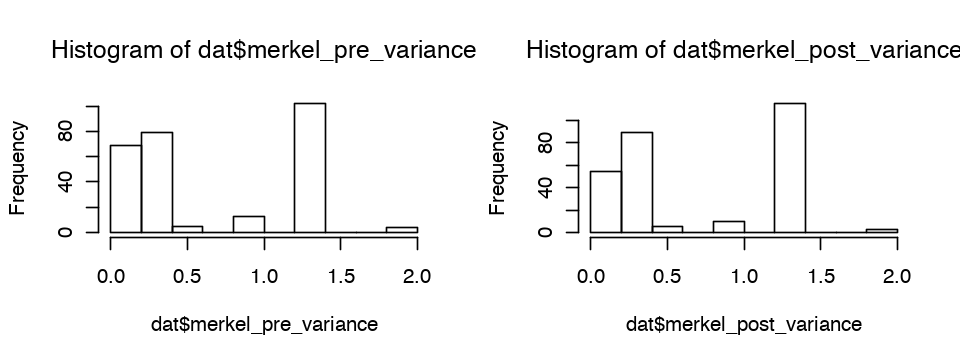

In [71]:
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1,2))
hist(dat$merkel_pre_variance)
hist(dat$merkel_post_variance)
par(mfrow=c(1,1))

In [72]:
unique(dat$merkel_pre_variance) # select 1.0, 1.33, and 2
unique(dat$merkel_post_variance) # select 1.0, 1.33 and 2

[1] 0.3333333        NA 0.0000000 1.3333333 1.0000000 2.0000000 0.5000000

[1] 0.0000000 1.3333333 0.3333333        NA 1.0000000 0.5000000 2.0000000

In [87]:
dat$CPA_1_text_num <- as.numeric(as.factor(dat$CPA_1_text))

dat_contro_pre <- filter(dat, merkel_pre_variance >= 1) %>% select(X, Question_text, CPA_1_text, CPA_1_text_num,
                                                                   merkel_pre_variance,
                                                                   merkel_pre_2, merkel_pre_3c,
                                                                    merkel_pre_tgt, merkel_pre_text)

dat_contro_post <- filter(dat, merkel_post_variance >= 1)%>% select(X,Question_text, CPA_1_text, CPA_1_text_num,
                                                                    merkel_post_variance,
                                                                   merkel_post_2, merkel_post_3c,
                                                                    merkel_post_tgt, merkel_post_text)

In [88]:
head(dat_contro_pre)
head(dat_contro_post)

X,Question_text,CPA_1_text,CPA_1_text_num,merkel_pre_variance,merkel_pre_2,merkel_pre_3c,merkel_pre_tgt,merkel_pre_text
8,"Die Regierung hat sich vorgenommen, bis 2018 das schnelle Internet flächendeckend anzubieten. Schätzun- gen zufolge würde ein Ausbau die Telekommunikationsun- ternehmen ohne Unterstützung rund 20 Milliarden Euro kosten. Was meinen Sie: Sollte der Staat den Unterneh- men Steuererleichterungen oder Fördermittel für den Aus- bau des schnellen Internets gewähren oder sollte er das nicht?","Space, Science, Technology and Communications",16,1.333333,1,-1,-1,"Es muss also vor allem um die Mobilisierung privater Investitionen gehen. Ich begrüße deshalb ausdrücklich, dass dies auch die zentrale Stoßrichtung der Vorschläge von Jean-Claude Juncker ist. Es muss darüber hinaus sichergestellt werden, dass zusätzlich mobilisierte Mittel sinnvoll und effektiv eingesetzt werden. Wir müssen in Zukunftsbereiche investieren. Es müssen Zukunftsbereiche sein, die der strategischen Agenda, die wir im Juni beschlossen haben, entsprechen. Dazu gehören zum Beispiel die digitale Wirtschaft, kleine und mittlere Unternehmen, der Energiebereich, gegebenenfalls die Elektromobilität, also Dinge, mit denen wir unsere Wettbewerbsfähigkeit verbessern, meine Damen und Herren. Wir müssen in Zukunftsprojekte investieren, also in Projekte, die wirtschaftlich sinnvoll sind und die nachhaltiges Wachstum fördern. Ich unterstütze die Idee, die Europäische Investitionsbank zu nutzen, um Projekte auszuwählen, die genau diese Kriterien erfüllen. Es ist nämlich wichtig, den Weg über die Europäische Investitionsbank zu gehen, weil nur so sichtbar wird, wo es rentable Projekte gibt, bei denen auch privates Kapital mit einsteigt. Die Politik kann diese Auswahl nicht treffen, obwohl Sie ja offensichtlich Interesse daran haben."
9,"Der Beschluss der Bundesregierung sieht vor, dass Deutschland bis zum Jahr 2022 ganz aus der Kernenergie aussteigt. Sind wir mit der Energiewende, also der Umstel- lung auf erneuerbare Energien auf dem richtigen Weg?",Energy,6,1.333333,1,-1,-1,"Eine weitere drängende Frage ist, wie wir die globale Energieversorgung sichern. Deutschland hat nach der Reaktorkatastrophe von Fukushima vor bald vier Jahren den beschleunigten Ausstieg aus der Kernenergie, die Energiewende, beschlossen. Seitdem investieren wir verstärkt in den Ausbau und die Nutzung erneuerbarer Energien, in neue Speichertechnologien und in Technologien zur Verbesserung der Energieeffizienz. Ich will nicht verschweigen, dass eine solche Energiewende auch für ein Hochtechnologieland wie Deutschland durchaus eine Herkulesaufgabe ist – eine nationale Kraftanstrengung. Sie bietet aber, davon bin ich überzeugt, deutlich mehr Chancen als Risiken, wenn wir sie konsequent angehen."
10,"Wenn der Energiebedarf auf absehbare Zeit nicht alleine durch erneuerbare Energien gedeckt werden kann, wie sollte man Ihrer Meinung nach die Energieversorgung si- cherstellen: Durch...(INT: Permutation der Statements A- E; Mehrfachnennungen möglich): eine längere Nutzung der Kernkraftwerke,",Energy,6,1.333333,1,-1,-1,"Eine weitere drängende Frage ist, wie wir die globale Energieversorgung sichern. Deutschland hat nach der Reaktorkatastrophe von Fukushima vor bald vier Jahren den beschleunigten Ausstieg aus der Kernenergie, die Energiewende, beschlossen. Seitdem investieren wir verstärkt in den Ausbau und die Nutzung erneuerbarer Energien, in neue Speichertechnologien und in Technologien zur Verbesserung der Energieeffizienz. Ich will nicht verschweigen, dass eine solche Energiewende auch für ein Hochtechnologieland wie Deutschland durchaus eine Herkulesaufgabe ist – eine nationale Kraftanstrengung. Sie bietet aber, davon bin ich überzeugt, deutlich mehr Chancen als Risiken, wenn wir sie konsequent angehen."
16,"Mit der Digitalen Agenda will die Bundesregierung den digitalen Wandel aktiv mitgestalten: Ziel ist, mit den Chan- cen der Digitalisierung wirtschaftliches Wachstum und neue Beschäftigung

X,Question_text,CPA_1_text,CPA_1_text_num,merkel_post_variance,merkel_post_2,merkel_post_3c,merkel_post_tgt,merkel_post_text
3,"Wie schätzen Sie die Versorgung in verschiedenen Berei- chen an Ihrem Wohnort ein? Sie können jeweils antworten mit sehr gut, eher gut, eher schlecht oder sehr schlecht. (INT: Permutation der Statements) : F Kulturelles Angebot, z.B. Kinos, Theater, Museen",Education,5,1.333333,1,-1,-1,"Auf der einen Seite leisten wir erhebliche Beiträge zur Erforschung und Vermittlung von Kultur und Geschichte der Deutschen im östlichen Europa. In diesem Jahr sind es insgesamt über 23 Millionen Euro, die wir Museen, Wissenschafts- und Kultureinrichtungen hierfür zur Verfügung stellen. Neben dem Westpreußischen Landesmuseum in Warendorf fördern wir zum Beispiel das Pommersche Landesmuseum in Greifswald – inzwischen Teil meines Wahlkreises. Dieses Pommersche Landesmuseum lädt derzeit zu einer sehenswerten Sonderausstellung ein, die den Titel „Zwei Männer - ein Meer. Pechstein und Schmidt-Rottluff an der Ostsee“ trägt. Ich kann Sie alle nur ganz herzlich einladen. Es gibt da auch noch manch anderes zu sehen. Greifswald ist auch die Stadt von Caspar David Friedrich."
7,"Wenn es um die Finanzierung des Internetausbaus geht, wer sollte das Ihrer Meinung nach vorrangig bezahlen?","Space, Science, Technology and Communications",16,1.333333,-1,1,-1,"Die Bundeskanzlerin begrüßt, dass die Mittel aus dem 315-Milliarden-Programm über die EIB investiert werden. ""Diese Bank verfügt über Erfahrungen. Sie weiß, wo Investitionen lohnend sind, wo man auch noch zusätzlich privates Kapital einwerben kann"", erklärt Merkel. Sie plädiert mit Nachdruck für ""zukunftsfähige Investitionen"". Die Bundeskanzlerin nennt Investitionen in den Breitbandausbau und im Forschungsbereich. Es gehe darum, ""dass daraus neue Arbeitsplätze entstehen, dass daraus auch Wertschöpfung entsteht, die uns als Europäische Union, aber auch als Mitgliedsstaaten insgesamt stärker macht."""
9,"Der Beschluss der Bundesregierung sieht vor, dass Deutschland bis zum Jahr 2022 ganz aus der Kernenergie aussteigt. Sind wir mit der Energiewende, also der Umstel- lung auf erneuerbare Energien auf dem richtigen Weg?",Energy,6,1.333333,1,-1,-1,"Für den Erfolg des Langfristprojekts Energiewende ist allerdings das Strommarktdesign nicht das alleinige Kriterium, sondern wir brauchen auch Entscheidungen für den notwendigen Netzausbau. Der Ausbau erneuerbarer Energien und der beschleunigte Ausstieg aus der Kernenergie führen dazu, dass Strom zunehmend fernab der Verbrauchszentren gefördert wird."
10,"Wenn der Energiebedarf auf absehbare Zeit nicht alleine durch erneuerbare Energien gedeckt werden kann, wie sollte man Ihrer Meinung nach die Energieversorgung si- cherstellen: Durch...(INT: Permutation der Statements A- E; Mehrfachnennungen möglich): eine längere Nutzung der Kernkraftwerke,",Energy,6,1.333333,1,-1,-1,"Für den Erfolg des Langfristprojekts Energiewende ist allerdings das Strommarktdesign nicht das alleinige Kriterium, sondern wir brauchen auch Entscheidungen für den notwendigen Netzausbau. Der Ausbau erneuerbarer Energien und der beschleunigte Ausstieg aus der Kernenergie führen dazu, dass Strom zunehmend fernab der Verbrauchszentren gefördert wird."
13,"Wenn der Energiebedarf auf absehbare Zeit nicht alleine durch erneuerbare Energien gedeckt werden kann, wie sollte man Ihrer Meinung nach die Energieversorgung si- cherstellen: Durch...(INT: Permutation der Statements A- E; Mehrfachnennungen möglich): Stromimporte aus dem Ausland",Energy,6,1.333333,-1,1,-1,"BK’in Merkel: Deutschland bezieht etwa 30 Prozent seines Gasbedarfs aus Russland. In Ungarn ist die Abhängigkeit höher, und auch die Ausrichtung auf Gas ist hier höher; bei uns gibt es auch noch eine sehr starke Abhängigkeit von Kohle und Erdöl. Wir sind natürlich alle daran interessiert, zuverlässige Energiebeziehungen zu haben, damit im Winter unsere Bevölkerung vernünftig leben kann und gleichzeitig unsere Wirtscha

In [89]:
## Inspecting the criteria
# 1. Variance
dat_contro_pre %>% group_by(merkel_pre_variance) %>% dplyr::summarize(count = n())
dat_contro_post %>% group_by(merkel_post_variance) %>% dplyr::summarize(count = n())

# 2. Topics
dat_contro_pre %>% group_by(CPA_1_text) %>% dplyr::summarize(count = n())
dat_contro_post %>% group_by(CPA_1_text) %>% dplyr::summarize(count = n())


merkel_pre_variance,count
1.000000,13
1.333333,102
2.000000,4


merkel_post_variance,count
1.000000,10
1.333333,115
2.000000,3


CPA_1_text,count
"Banking, Finance, and Domestic Commerce",5
"Civil Rights, Minority Issues and Civil Liberties",13
Defense,1
Education,3
Energy,19
Environment,6
Foreign Trade,5
Healthcare,3
International Affairs and Foreign Aid,23
"Labor, Employment and Immigration",7


CPA_1_text,count
"Banking, Finance, and Domestic Commerce",4
"Civil Rights, Minority Issues and Civil Liberties",21
Defense,1
Education,3
Energy,15
Environment,5
Foreign Trade,7
Healthcare,2
International Affairs and Foreign Aid,26
"Labor, Employment and Immigration",6


In [90]:
## The ones that has the greatest variances: Turns out all of them are NAs in the end
dat_contro_pre %>% filter(merkel_pre_variance == 2) %>% select(X, Question_text, CPA_1_text, CPA_1_text_num,
                                                              merkel_pre_tgt, merkel_pre_text)
dat_contro_post %>% filter(merkel_post_variance == 2) %>% select(X, Question_text, CPA_1_text, CPA_1_text_num,
                                                              merkel_post_tgt, merkel_post_text)


X,Question_text,CPA_1_text,CPA_1_text_num,merkel_pre_tgt,merkel_pre_text
60,"""Hier auf den Karten steht Verschiedenes, was uns andere über das geplante Freihandelsabkommen TTIP gesagt haben. Welchen dieser Aussagen würden Sie zustimmen, und welchen Aussagen würden Sie nicht zustimmen? Bitte verteilen Sie die Karten entsprechend auf das Blatt. Karten, bei denen Sie sich nicht entscheiden können, legen Sie bitte beiseite."" (Jeweils Zutreffendes einkreisen!) Ich glaube, dass sich durch das Freihandelsabkommen nicht viel ändern wird",Foreign Trade,8,NA,"Meine Damen und Herren, wir alle wissen, wir können uns in dieser Welt nicht abschotten. Deshalb möchte ich abschließend ein großes Plädoyer dafür einlegen, dass die Europäische Union offen ist für Freihandelsabkommen: ein Freihandelsabkommen mit Japan, ein Freihandelsabkommen mit Kanada – das ist weitgehend verhandelt und muss noch ratifiziert werden – und ein Freihandelsabkommen mit den Vereinigten Staaten von Amerika. Der Präsident der Vereinigten Staaten von Amerika hat sich gerade erst wieder zu diesem Freihandelsabkommen bekannt. Und Europa sollte die einzigartige Chance suchen, nicht nur seine Wachstumsmöglichkeiten durch weniger Hemmnisse im transatlantischen Handel zu beschleunigen und zu vergrößern, sondern bei unseren hohen Standards im Verbraucherschutz und im Umweltschutz sowohl in Europa als auch in den Vereinigten Staaten von Amerika etwas für die Standardsetzung weltweit zu tun. Das können wir nur, wenn wir gemeinsam agieren. Deshalb werde ich mich in diesem Jahr sehr stark dafür einsetzen."
152,Die Bundesregierung hat eine verschärfte Meldepflicht für Krankenhäuser auf den Weg gebracht. Das Auftreten resistenter Keime muss in Zukunft bereits beim ersten Nachweis an das örtliche Gesundheitsamt gemeldet werden. Halten Sie das für eine angemessene Maßnahme oder halten Sie das für übertrieben?,Healthcare,10,NA,"Das dritte Thema, das wir auf deutscher Seite in der G7-Präsidentschaft bearbeiten wollen, ist das Thema Antibiotikaresistenzen. Hierzu haben uns die Nationalen Akademien der Wissenschaften Hinweise gegeben – wie im Übrigen auch zum Thema vernachlässigte Tropenkrankheiten. Ich glaube, dies ist ein Thema, das von ausschlaggebender Bedeutung für die Menschheit insgesamt ist – und zwar sowohl in den entwickelten als auch in den weniger entwickelten Ländern. Es geht darum, dass wir die Wirksamkeit existierender Antibiotika sichern und ihren Einsatz ausschließlich auf medizinisch notwendige Anwendungen beschränken – nicht nur bei Menschen, sondern auch bei Tieren. Hierzu wollen wir auf dem G7-Treffen gerade auch für Industrieländer möglichst strenge Maßstäbe vereinbaren. Restriktiv müssen die Wirkstoffe deshalb eingesetzt werden, weil es, wenn Krankheitserreger einmal resistent gegen sie sind – anders als zum Beispiel bei den vernachlässigten Tropenkrankheiten –, viel schwieriger ist, neue Wirkstoffe zu erforschen. Die pharmazeutische Industrie ist ein wichtiger Partner im Kampf gegen Krankheiten, aber sie kann auch nichts vollbringen, was durch Forschung nicht geschafft werden kann. Ich habe mir berichten lassen, wie schwierig es ist, neue Wirkstoffe für Antibiotika, die die alten ersetzen, zu erforschen. Deshalb müssen wir sorgsam damit umgehen, um hierbei voranzukommen, und einen Ansatz haben, der heißt: „Eine Gesundheit“-Ansatz für Mensch und Tier. Ich freue mich sehr, dass sich die Weltgesundheitsversammlung vorgenommen hat, erstmals einen globalen Aktionsplan gegen antimikrobielle Resistenzen zu entwickeln. Jedes Land sollte einen solchen Plan haben. Deutschland hat vor wenigen Tagen im Kabinett einen solchen Plan beschlossen. Diesbezüglich wird in der Humanmedizin und der Veterinärmedizin eng zusammengearbeitet."
170,"""Einmal ganz allgemein gefragt: Fühlen Sie sich durch die Medien wie Fernsehen, Zeitung, Internet usw. ausreichend über die Ziele und Maßnahmen der Bundesregierung informiert, oder würden Sie das nicht sagen?""","Space, Science, Technology and

X,Question_text,CPA_1_text,CPA_1_text_num,merkel_post_tgt,merkel_post_text
161,"""Was kann man über die EU sagen? Hier auf den Karten ist Verschiedenes aufgeschrieben. Was davon trifft Ihrer Meinung nach auf die EU zu? Legen Sie einfach die entsprechenden Karten heraus."" (Alles Genannte einkreisen!) Notwendiger Zusammen- schluss, um sich gegen Großmächte wie USA und China zu behaupten",International Affairs and Foreign Aid,11,NA,"Herr Präsident, liebe Kolleginnen und Kollegen, die Themen, die wir heute beim Europäischen Rat in Brüssel besprechen werden, machen einmal mehr deutlich, wie sehr wir ein Europa brauchen, das sich solidarisch verhält, statt gesamteuropäische Herausforderungen zu Problemen einzelner Mitgliedstaaten zu erklären. Ein Europa, das in einer globalisierten Welt seiner Verantwortung gerecht wird, weil es seine Werte und Interessen weltweit behaupten will, das muss ein solidarisches Europa sein. Alles andere wird scheitern. Ein Europa, das diese Solidarität annimmt und auch lebt das wird noch ein mühevoller Prozess; aber ich glaube, dass wir erfolgreich sein können , ein solches Europa, das auf dieser Grundlage arbeitet, wird auch stärker aus dieser Krise hervorgehen, als es in diese Krise hineingegangen ist. Ich werde mich heute beim Europäischen Rat dafür einsetzen und bitte um Ihrer aller Unterstützung."
170,"""Einmal ganz allgemein gefragt: Fühlen Sie sich durch die Medien wie Fernsehen, Zeitung, Internet usw. ausreichend über die Ziele und Maßnahmen der Bundesregierung informiert, oder würden Sie das nicht sagen?""","Space, Science, Technology and Communications",16,NA,"Jetzt aber will man trotzdem zu einem modernen, transparenten rechtsstaatlichen Verfahren kommen. Schon die Vorschriften im Handelsabkommen mit Kanada zu den Investitionsschutzverfahren sind sehr viel moderner und transparenter als jemals zuvor. Die Diskussion ist interessanterweise in dem Moment aufgetreten, in dem Investitionsschutzfragen nicht mehr bilateral zwischen den Ländern verhandelt worden sind, sondern mit dem Lissabon-Vertrag Teil der Europäischen Verträge geworden sind. Jetzt kümmert sich Europa darum. Daraus ist jetzt eine europaweite Diskussion entstanden. Jetzt hat die Kommission einen interessanten Vorschlag auch über die Bildung eines internationalen Schiedsgerichtshofs gemacht, der erstmals bilateral zwischen den Vereinigten Staaten von Amerika und Europa funktionieren könnte. Wir begrüßen diesen Vorschlag ausdrücklich und werden ihn in die Verhandlungen einbringen."
254,"""Was meinen Sie: Was sind große Risiken für die weitere Entwicklung von Deutschland, wo sehen Sie da vor allem Gefahren?"" (Alles Genannte einkreisen!) Ein Anstieg der Arbeitslosigkeit","Labor, Employment and Immigration",12,NA,"Es geht uns im Augenblick vergleichsweise gut: stabiler wirtschaftlicher Aufschwung, die Arbeitslosigkeit ist auf dem niedrigsten Stand seit 25 Jahren. Wir haben über 43 Millionen Erwerbstätige. Es wird heute mehr darüber gesprochen, wo wir Fachkräfte herbekommen, als über die Fragen der Arbeitslosigkeit, obwohl ich daran erinnern möchte: Wir haben immer noch fast drei Millionen Arbeitslose, darunter sehr viele Langzeitarbeitslose. Auch das dürfen wir in Deutschland nicht vergessen. Wir kennen hierbei auch unsere staatliche Verantwortung."


In [91]:
## The ones with variance equals to 1 or 1.33

dat_contro_pre <-  dat_contro_pre %>% filter(merkel_pre_variance < 2) 
dat_contro_post <- dat_contro_post %>% filter(merkel_post_variance < 2) 

In [92]:
## Inspecting the criteria
# 1. Variance
dat_contro_pre %>% group_by(merkel_pre_variance) %>% dplyr::summarize(count = n())
dat_contro_post %>% group_by(merkel_post_variance) %>% dplyr::summarize(count = n())

# 2. Topics
dat_contro_pre %>% group_by(CPA_1_text, CPA_1_text_num) %>% dplyr::summarize(count = n())
dat_contro_post %>% group_by(CPA_1_text, CPA_1_text_num) %>% dplyr::summarize(count = n())

# Decision to make: Topics. We randomly sample 20% of the questions in each topic, the ones with lower than 1 get 1
# observation in the sample.

merkel_pre_variance,count
1.000000,13
1.333333,102


merkel_post_variance,count
1.000000,10
1.333333,115


CPA_1_text,CPA_1_text_num,count
"Banking, Finance, and Domestic Commerce",2,5
"Civil Rights, Minority Issues and Civil Liberties",3,13
Defense,4,1
Education,5,3
Energy,6,19
Environment,7,6
Foreign Trade,8,4
Healthcare,10,2
International Affairs and Foreign Aid,11,23
"Labor, Employment and Immigration",12,6


CPA_1_text,CPA_1_text_num,count
"Banking, Finance, and Domestic Commerce",2,4
"Civil Rights, Minority Issues and Civil Liberties",3,21
Defense,4,1
Education,5,3
Energy,6,15
Environment,7,5
Foreign Trade,8,7
Healthcare,10,2
International Affairs and Foreign Aid,11,25
"Labor, Employment and Immigration",12,5


In [102]:
v_pre <- dat_contro_pre %>% group_by(CPA_1_text_num) %>% dplyr::summarize(count = ceiling(0.2*n())) %>% select(count)
v_pre <- as.vector(v_pre$count) 

v_post <- dat_contro_post %>% group_by(CPA_1_text_num) %>% dplyr::summarize(count = ceiling(0.2*n())) %>% select(count)
v_post <- as.vector(v_post$count) 

In [103]:
## Function for stratesampling
stratSample <- function(data, stratvar = "", sample.size = NULL, replace = TRUE) {
  require(plyr)
  require(dplyr)
  strats <- unique(data[,stratvar]) # Define the strata
    if (class(strats) != "numeric") {
      strats <- pull(strats)
    } else {
      strats <- strats
    } # Designed for .tbl object
  stratnames <- sort(strats) # Defining the reference of strata
  stratnum <- length(stratnames) # how many strata we want to draw?
  samplesize <- sample.size # For each stratum
  stratsample <- list()
  for (i in 1:stratnum) {
    obs <- which(data[,stratvar] == stratnames[i]) # identify the position 
    stratsample[[i]] <- data[sample(obs, size = samplesize[i], replace = replace),]
  }
  stratsample_df <- rbind.fill(stratsample)
  return(stratsample_df)
}


In [106]:
contro_pre_samp <- stratSample(data = dat_contro_pre, stratvar = "CPA_1_text_num", 
                               sample.size = v_pre, replace = FALSE)
contro_post_samp <- stratSample(data = dat_contro_post, stratvar = "CPA_1_text_num", 
                               sample.size = v_post, replace = FALSE)

In [109]:
dim(contro_pre_samp)
dim(contro_post_samp)

[1] 30  9

[1] 31  9

In [112]:
contro_pre_samp %>% group_by(CPA_1_text_num)
write.csv2(contro_pre_samp, "sample_pre.csv")

X,Question_text,CPA_1_text,CPA_1_text_num,merkel_pre_variance,merkel_pre_2,merkel_pre_3c,merkel_pre_tgt,merkel_pre_text
46,"""Zu etwas anderem: Auf diesen Karten stehen verschiedene Begriffe. Dabei kann man ja verschieden empfinden, ob sie einem sympathisch sind oder nicht sympathisch. Könnten Sie bitte diese Karten ein- mal hier auf das Blatt verteilen, je nachdem, wie Sie das empfinden. Wenn Sie sich bei einem Begriff wirklich nicht entscheiden können, legen Sie die Karte bitte beiseite."" (Jeweils Zutreffendes einkreisen!) : Verbraucherschutz","Banking, Finance, and Domestic Commerce",2,1.333333,1,-1,-1,"Und Europa sollte die einzigartige Chance suchen, nicht nur seine Wachstumsmöglichkeiten durch weniger Hemmnisse im transatlantischen Handel zu beschleunigen und zu vergrößern, sondern bei unseren hohen Standards im Verbraucherschutz und im Umweltschutz sowohl in Europa als auch in den Vereinigten Staaten von Amerika etwas für die Standardsetzung weltweit zu tun"
85,"Und was meinen Sie, wenn es um ... geht, kommt da die Bundesregierung eher voran oder eher nicht voran? eine bessere Eingliederung der Ausländer in Deutschland","Civil Rights, Minority Issues and Civil Liberties",3,1.333333,1,-1,-1,"Fachkräftesicherung ist sicherlich ein Thema, das uns in den nächsten Jahren an-gesichts der demografischen Entwicklung intensiv beschäftigen wird. Wir dürfen nicht vergessen: Wir haben immer noch fast drei Millionen Arbeitslose und darunter einen wachsenden Anteil von Langzeitarbeitslosen. Es muss unser politisches Interesse sein, diese Zahl zu senken. Wir haben im Bereich der Alleinerziehenden durch den Ausbau der Kinderbetreuung schon einiges erreicht. Aber wir müssen weitermachen. Wir müssen jetzt auch aufpassen, dass wir im Zusammenhang mit der Integration von Asylbewerbern das Fachkräftepotenzial nutzen. Wir haben ins-besondere mit dem Handwerk darüber gesprochen. Ich bedanke mich für die Bereitschaft, diese Integration durchzuführen. Sie brauchen dafür berechenbare Bedingungen. Daran arbeiten wir. Aber wir dürfen auch den Teil der Langzeitarbeitslosen, die aus Deutschland kommen, nicht vergessen. Denken wir immer daran: Wir geben nach wie vor Milliarden für Hartz IV aus. Allein der Gedanke, man könnte davon einen relevanten Teil in Investitionen stecken, ist sehr spannend und interessant."
250,Und wie zufrieden waren Sie 2015 mit den politischen Entwicklungen in Deutschland in den folgenden Politikbereichen? Flüchtlingspolitik,"Civil Rights, Minority Issues and Civil Liberties",3,1.333333,1,-1,-1,"Liebe Freunde, es steht völlig außer Frage: Die Aufgabe, die wir jetzt zu bewältigen haben – die vielen, vielen Flüchtlinge –, ist riesig. Ich will mit einem Dankeschön an alle haupt- und ehren- amtlichen Helferinnen und Helfer beginnen. Sie leisten tagtäglich Unglaubliches, sie wachsen über sich hinaus. Es ist wunderbar, wie sich unser Land präsentiert. Ein herzliches Dankeschön! Wir sind die Volkspartei Christlich Demokratische Union, die die Sorgen der Menschen aufnimmt. Aber wir sind auch die Volkspartei, die Sorgen nicht nur aufnimmt, sondern die gestaltet und Lö- sungen findet. Das muss unser Anspruch sein, und dem werden wir mit dieser Erklärung gerecht. Deshalb wollen und werden wir die Zahl der Flüchtlinge spürbar reduzieren, weil das im Übrigen im Interesse aller ist: Es ist im deutschen Interesse – mit Blick auf die Aufgaben, von der Versor- gung der Flüchtlinge bis hin zur Integration in die Gesellschaft und im Arbeitsmarkt. Es ist im eu- ropäischen Interesse – mit Blick auf unsere innere Verfasstheit in der Europäischen Union und mit Blick auf unsere Rolle in der Welt. Und, liebe Freunde, es ist im Interesse der Flüchtlinge selbst; denn niemand, egal, warum er sich auf den Weg macht, verlässt leichtfertig seine Heimat."
177,"Ich nenne Ihnen nun einige Themen und möchte wissen, wie wichtig Sie es finden, dass sich da etwas verbessert: Wie wichtig finden Sie ... : es, dass der Datenschutz verbessert wird?","Civil Rights, 

In [113]:
contro_post_samp %>% group_by(CPA_1_text_num)
write.csv2(contro_post_samp, "sample_post.csv")

X,Question_text,CPA_1_text,CPA_1_text_num,merkel_post_variance,merkel_post_2,merkel_post_3c,merkel_post_tgt,merkel_post_text
46,"""Zu etwas anderem: Auf diesen Karten stehen verschiedene Begriffe. Dabei kann man ja verschieden empfinden, ob sie einem sympathisch sind oder nicht sympathisch. Könnten Sie bitte diese Karten ein- mal hier auf das Blatt verteilen, je nachdem, wie Sie das empfinden. Wenn Sie sich bei einem Begriff wirklich nicht entscheiden können, legen Sie die Karte bitte beiseite."" (Jeweils Zutreffendes einkreisen!) : Verbraucherschutz","Banking, Finance, and Domestic Commerce",2,1.333333,1,-1,-1,"Wir haben im Übrigen in keinem der Freihandelsabkommen jemals unsere Verbraucherschutzstandards, unsere Umweltstandards irgendwie nivelliert, weil natürlich weiter alle Richtlinien gelten, die wir innerhalb der Europäischen Union schon beschlossen haben"
199,"Wie stark stimmen Sie den folgenden Aussagen über Flüchtlinge bzw. Asylbewerber in Deutschland zu? Stimmen Sie voll und ganz zu, eher zu, stimmen Sie eher nicht zu oder stimmen Sie gar nicht zu? der Zuzug von Flüchtlingen bereichert Deutschland kulturell","Civil Rights, Minority Issues and Civil Liberties",3,1.000000,1,-1,0,"BILD: Was muss passieren, dass aus der Ankündigung ""Der Islam gehört zu Deutschland"" nicht irgendwann die Feststellung ""Deutschland gehört dem Islam"" wird? Merkel: So etwas muss niemand befürchten. Deutschland, das ist und bleibt das Grundgesetz, die soziale Marktwirtschaft, Religions- und Meinungsfreiheit. Wir machen den zu uns kommenden Menschen vom ersten Tag an klar: Hier gelten Gesetze und Regeln des Zusammenlebens, die sie befolgen müssen. Nur so kann Deutschland für sie ein Ort des Schutzes sein. Sie müssen akzeptieren, dass in Deutschland Frauen und Männer die gleichen Rechte haben. Sie werden sich auch von Polizistinnen oder Richterinnen oder Beamtinnen etwas sagen lassen müssen. Und sie werden sehen, dass Verwaltung bei uns nicht so funktioniert, dass man jemanden mit Geld bestechen kann und dann das gewünschte Ergebnis bekommt. Ich bin überzeugt, dass die meisten das alles respektieren und schnell schätzen lernen werden."
69,"Welcher der Meinungen zur Zuwanderung hochqualifizierter Fachkräfte aus dem Ausland würden Sie eher zustimmen? A: „Viele Betriebe suchen händeringend nach Facharbeitern. Wenn sich hierzulande niemand findet, sollten hochqualifizierte Fachkräfte aus dem Ausland zuwandern dürfen, um die Lücke zu füllen.“ B: „Wir haben immer noch rund drei Millionen Arbeitslose. Vor einem Zuzug von Menschen aus dem Ausland sollte man die Arbeitslosen hierzulande so weiterbilden, dass sie die Jobs machen können.“","Civil Rights, Minority Issues and Civil Liberties",3,1.333333,1,-1,1,"Wir müssen jetzt auch aufpassen, dass wir im Zusammenhang mit der Integration von Asylbewerbern das Fachkräftepotenzial nutzen. Wir haben ins-besondere mit dem Handwerk darüber gesprochen. Ich bedanke mich für die Bereitschaft, diese Integration durchzuführen. Sie brauchen dafür berechenbare Bedingungen. Daran arbeiten wir. Aber wir dürfen auch den Teil der Langzeitarbeitslosen, die aus Deutschland kommen, nicht vergessen. Denken wir immer daran: Wir geben nach wie vor Milliarden für Hartz IV aus. Allein der Gedanke, man könnte davon einen relevanten Teil in Investitionen stecken, ist sehr spannend und interessant."
198,"Wie stark stimmen Sie den folgenden Aussagen über Flüchtlinge bzw. Asylbewerber in Deutschland zu? Stimmen Sie voll und ganz zu, eher zu, stimmen Sie eher nicht zu oder stimmen Sie gar nicht zu? durch den Zuzug von Flüchtlingen kann der Bedarf an qualifizierten Arbeitnehmern in Deutschland besser gedeckt werden","Civil Rights, Minority Issues and Civil Liberties",3,1.000000,1,-1,0,"Ich will hier nur die wesentlichen Stichworte nennen, die unser Gesetzespaket vorsieht. Das sind die Verpflichtungen des Bundes zur finanziellen Unterstützung der Länder und Kommunen, so die Einführung von Pauschalbeträgen, die sich nach der Zahl der tat